In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs


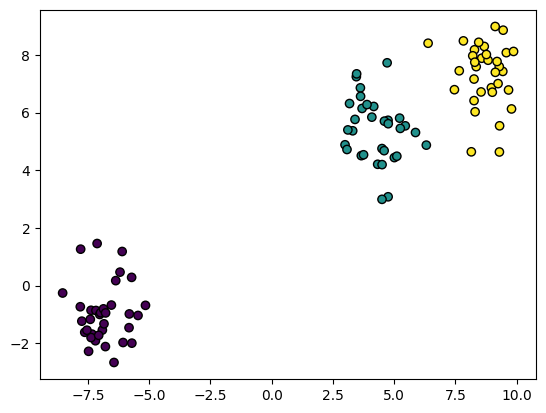

In [57]:
x,y = make_blobs(n_samples = 100 , n_features = 2,centers = 3)

plt.scatter(x[: , 0], x[: , 1], c=y, edgecolor='k')
plt.show()

In [58]:
def euclidian(data_point, centroids):
    return np.sqrt(np.sum((centroids-data_point)**2,axis=1))

In [97]:
class CustomKMeanClustering():
    
    def __init__(self,k,max_iterations):
        self.k = k
        self.centroids = None
        self.max_iterations = max_iterations
        
    def fit(self,x):
        
        # x.shape in this case will give (100,2)
        
        # randomly assigns centroids given a boundary of low an high
        self.centroids = np.random.uniform(low = (np.min(x,axis=0)),high = (np.max(x,axis= 0)),size =(self.k,x.shape[1]))
        
        # shape of centroids is (3,2)
        
        for _ in range(self.max_iterations):
            y = []
            
            # for each datapoint find which centroid it is closest to 
            for data_point in x:
                # returns a list of distances to each centroid
                distance = euclidian(data_point,self.centroids)
                
                # calculates the index of the closes centroid
                cluster_num = np.argmin(distance)
                
                y.append(cluster_num)
            
            # contains the closest centroid number for each data point
            y = np.asarray(y)
            
            print(f"Y: {y}")
            cluster_indeces = [] #  list of lists each list containing closest data point
            
            for i in range(self.k):
                cluster_indeces.append(np.argwhere(y==i))  # returns the indeces of values in y that equal i
                
            
            cluster_cntr  = [] # We need to recompute the clusters
            
            for i, indeces in enumerate(cluster_indeces):
                # base case if a cluster has no datapoints near
                if len(indeces) == 0:
                    cluster_cntr.append(cluster_indeces[i]) # keep it the same
                else:
                    cluster_cntr.append(np.mean(x[indeces],axis=0)[0])
            
            if np.max(self.centroids - np.array(cluster_cntr)) < 0.001: # meaning if no significant change to centroids then break
                break
                
            else:
                self.centroids = np.array(cluster_cntr)
                
            
            return y
                    
                
                    
                    

In [98]:
model = CustomKMeanClustering(k=3,max_iterations = 200)

labels = model.fit(x)

Y: [0 1 1 1 1 0 1 1 0 1 2 2 0 1 1 0 1 0 0 0 1 2 2 1 1 1 0 2 1 1 0 1 0 0 2 1 0
 1 0 0 2 0 1 2 1 0 2 2 0 0 1 1 0 2 0 0 1 0 1 0 1 1 0 0 1 0 2 1 2 1 1 1 0 1
 1 0 1 1 1 2 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 2 0]


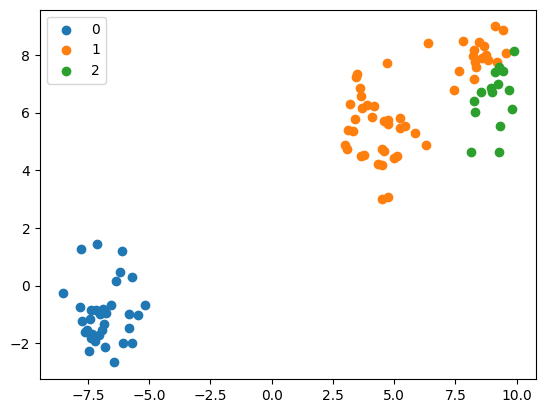

In [99]:
#Getting unique labels
 
u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(x[labels == i , 0] , x[labels == i , 1] , label = i)
plt.legend()
plt.show()